In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [2]:
pd.read_excel(r'C:\Users\admin\Desktop\churn dataset\Prediction_Data_2.xlsx')

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,99898-MAH,Female,39,No,Maharashtra,2,14,NaN,Yes,Yes,...,Bank Withdrawal,65.199997,3687.850098,0.00,0,87.779999,3775.629883,Stayed,Others,Others
6003,99912-WES,Female,60,Yes,West Bengal,11,26,Deal 4,Yes,No,...,Bank Withdrawal,19.650000,244.800003,0.00,0,430.690002,675.489990,Stayed,Others,Others
6004,99942-KER,Male,59,Yes,Kerala,8,18,NaN,Yes,No,...,Bank Withdrawal,69.699997,69.699997,0.00,0,21.520000,91.220001,Churned,Attitude,Attitude of service provider
6005,99942-TEL,Female,34,No,Telangana,0,34,NaN,Yes,Yes,...,Credit Card,70.900002,4677.100098,0.00,0,1880.020020,6557.120117,Stayed,Others,Others


In [3]:
Churn_Dataset = pd.read_excel(r'C:\Users\admin\Desktop\churn dataset\Prediction_Data_2.xlsx')


In [4]:
Churn_Dataset.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [5]:
Churn_Dataset.tail()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
6002,99898-MAH,Female,39,No,Maharashtra,2,14,NaN,Yes,Yes,...,Bank Withdrawal,65.199997,3687.850098,0.0,0,87.779999,3775.629883,Stayed,Others,Others
6003,99912-WES,Female,60,Yes,West Bengal,11,26,Deal 4,Yes,No,...,Bank Withdrawal,19.650000,244.800003,0.0,0,430.690002,675.489990,Stayed,Others,Others
6004,99942-KER,Male,59,Yes,Kerala,8,18,NaN,Yes,No,...,Bank Withdrawal,69.699997,69.699997,0.0,0,21.520000,91.220001,Churned,Attitude,Attitude of service provider
6005,99942-TEL,Female,34,No,Telangana,0,34,NaN,Yes,Yes,...,Credit Card,70.900002,4677.100098,0.0,0,1880.020020,6557.120117,Stayed,Others,Others
6006,99962-AND,Female,63,No,Andhra Pradesh,7,1,Deal 2,Yes,Yes,...,Credit Card,91.599998,4627.799805,0.0,60,937.039978,5624.839844,Stayed,Others,Others


In [6]:
Churn_Dataset.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


In [7]:
Churn_Dataset.describe(include='all')

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
count,6007,6007,6007.000000,6007,6007,6007.000000,6007.00000,2710,6007,6007,...,6007,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007,6007,6007
unique,6007,2,NaN,2,22,NaN,NaN,5,2,2,...,3,NaN,NaN,NaN,NaN,NaN,NaN,2,6,21
top,11098-MAD,Female,NaN,No,Uttar Pradesh,NaN,NaN,Deal 2,Yes,No,...,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN,Stayed,Others,Others
freq,1,3779,NaN,3012,581,NaN,NaN,758,5417,3335,...,3415,NaN,NaN,NaN,NaN,NaN,NaN,4275,4275,4275
mean,NaN,NaN,47.289163,NaN,NaN,7.439820,17.39454,NaN,NaN,NaN,...,NaN,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020,NaN,NaN,NaN
std,NaN,NaN,16.805110,NaN,NaN,4.622369,10.59292,NaN,NaN,NaN,...,NaN,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,0.000000,1.00000,NaN,NaN,NaN,...,NaN,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001,NaN,NaN,NaN
25%,NaN,NaN,33.000000,NaN,NaN,3.000000,8.00000,NaN,NaN,NaN,...,NaN,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998,NaN,NaN,NaN
50%,NaN,NaN,47.000000,NaN,NaN,7.000000,17.00000,NaN,NaN,NaN,...,NaN,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902,NaN,NaN,NaN
75%,NaN,NaN,60.000000,NaN,NaN,11.000000,27.00000,NaN,NaN,NaN,...,NaN,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059,NaN,NaN,NaN


In [8]:
Churn_Dataset.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [9]:
Churn_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [10]:
Churn_Dataset.isnull().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3297
Phone_Service                     0
Multiple_Lines                    0
Internet_Service                  0
Internet_Type                  1223
Online_Security                   0
Online_Backup                     0
Device_Protection_Plan            0
Premium_Support                   0
Streaming_TV                      0
Streaming_Movies                  0
Streaming_Music                   0
Unlimited_Data                    0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

In [11]:
print(Churn_Dataset.head)

<bound method NDFrame.head of      Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0      11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1      11114-PUN    Male   51      No          Punjab                    5   
2      11167-WES  Female   43     Yes     West Bengal                    3   
3      11179-MAH    Male   35      No     Maharashtra                   10   
4      11180-TAM    Male   75     Yes      Tamil Nadu                   12   
...          ...     ...  ...     ...             ...                  ...   
6002   99898-MAH  Female   39      No     Maharashtra                    2   
6003   99912-WES  Female   60     Yes     West Bengal                   11   
6004   99942-KER    Male   59     Yes          Kerala                    8   
6005   99942-TEL  Female   34      No       Telangana                    0   
6006   99962-AND  Female   63      No  Andhra Pradesh                    7   

      Tenure_in_Months Value_Deal

In [24]:
Churn_Dataset['Value_Deal'].unique()


array(['Deal 1', 'Deal 5', 'Deal 2', 'Deal 3', 'Deal 4'], dtype=object)

In [25]:
Churn_Dataset['Value_Deal'].isnull().sum()

0

In [26]:
Churn_Dataset = Churn_Dataset[Churn_Dataset['Value_Deal'].notna()]

In [27]:
Churn_Dataset['Value_Deal'].isnull().sum()

0

In [28]:
#Churn_Dataset['Value_Deal'] = Churn_Dataset['Value_Deal'].fillna('Deal 3')

In [29]:
Churn_Dataset['Value_Deal'].isnull().sum()

0

In [30]:
Churn_Dataset['Internet_Type'].unique()

array(['Fiber Optic', 'DSL', 'Cable'], dtype=object)

In [31]:
Churn_Dataset['Internet_Type'].isnull().sum()

0

In [32]:
Churn_Dataset = Churn_Dataset[Churn_Dataset['Internet_Type'].notna()]

In [33]:
Churn_Dataset['Internet_Type'].isnull().sum()

0

In [34]:
Churn_Dataset.isnull().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

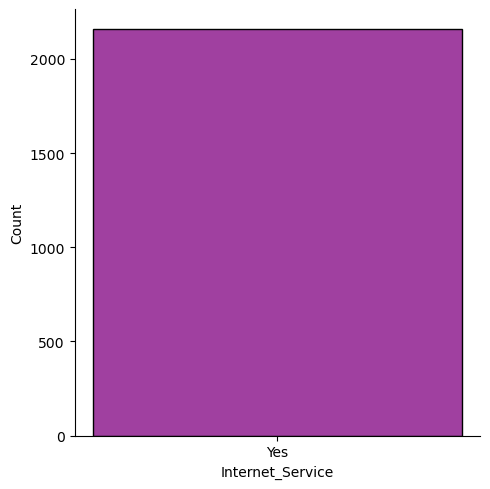

In [35]:
sns.displot(Churn_Dataset['Internet_Service'],color='purple')

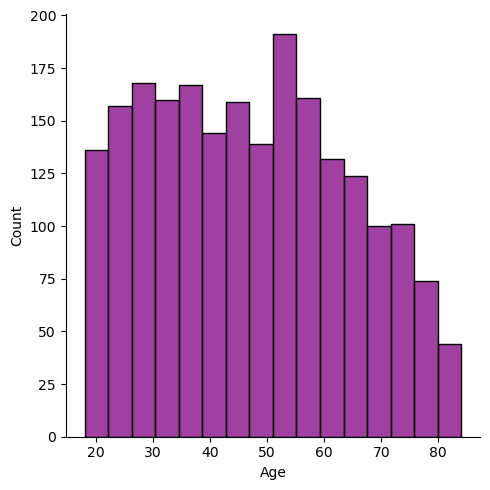

In [36]:
sns.displot(Churn_Dataset['Age'],color='purple')

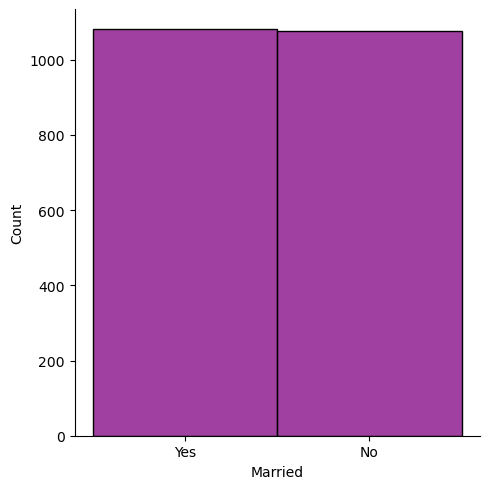

In [37]:
sns.displot(Churn_Dataset['Married'],color='purple')

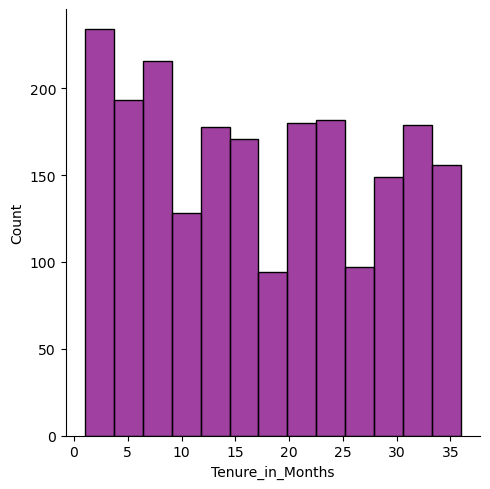

In [38]:
sns.displot(Churn_Dataset['Tenure_in_Months'],color='purple')

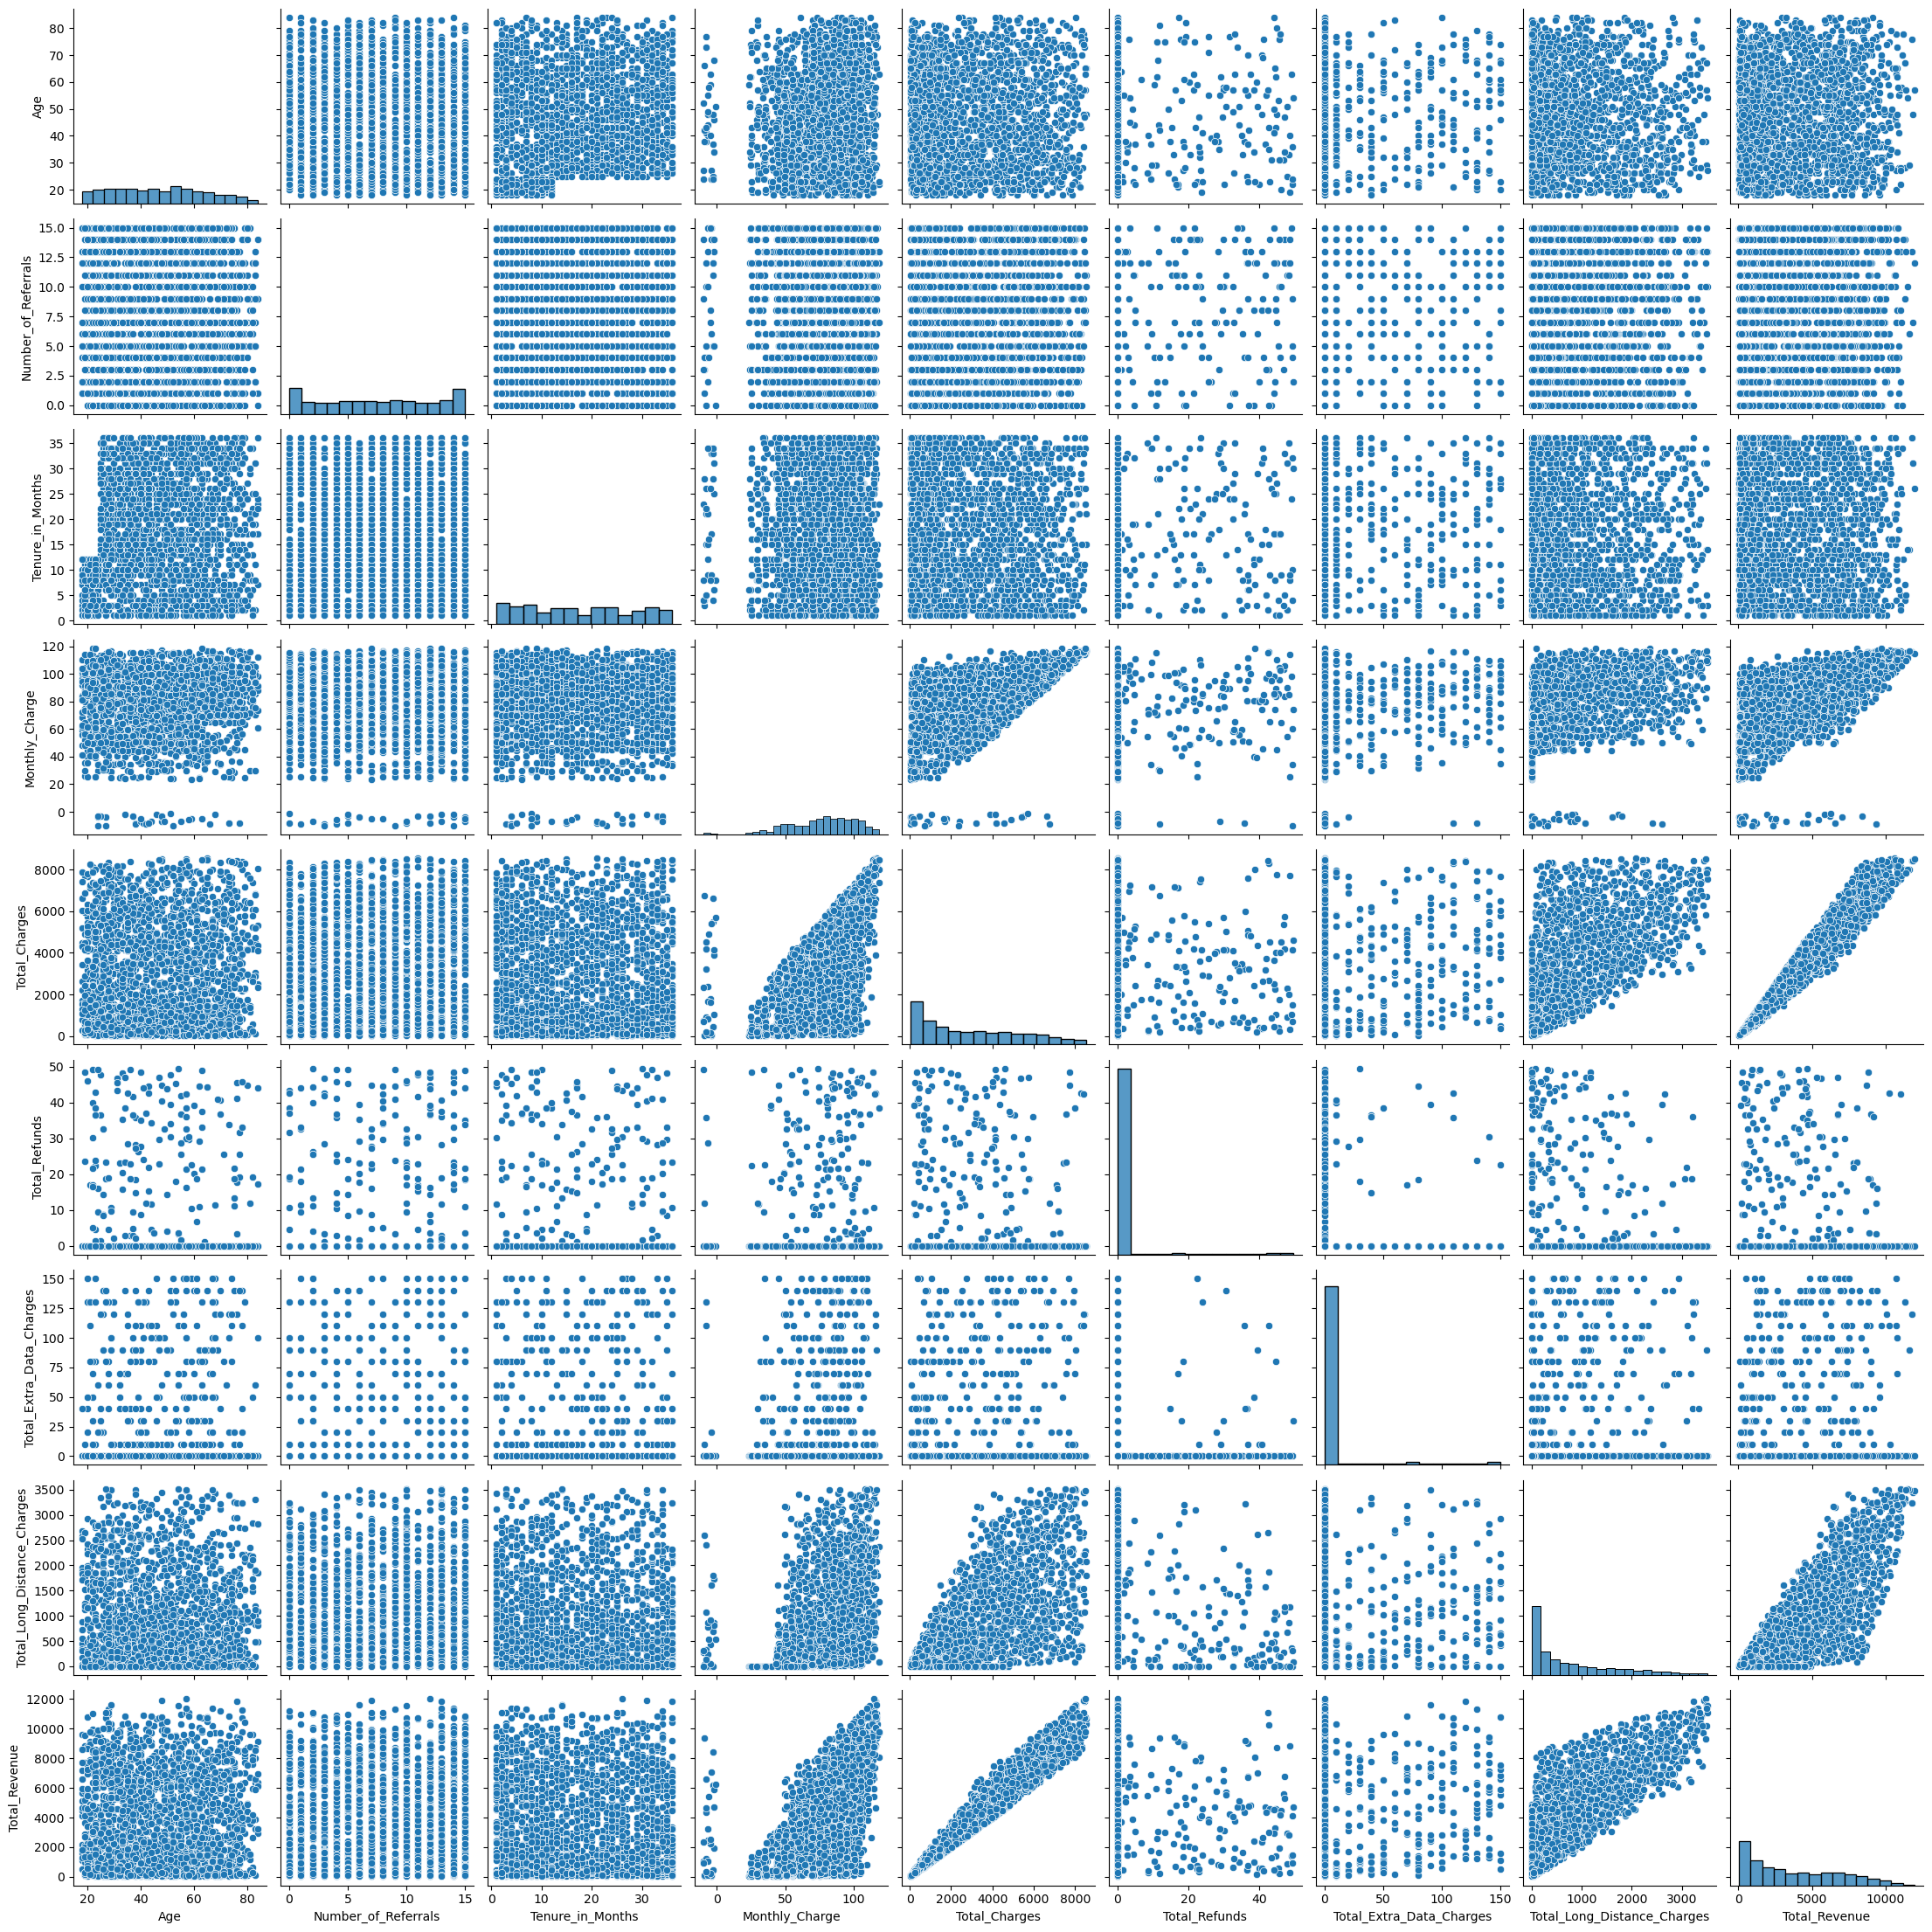

In [39]:
sns.pairplot(Churn_Dataset)
plt.show()

<Axes: >

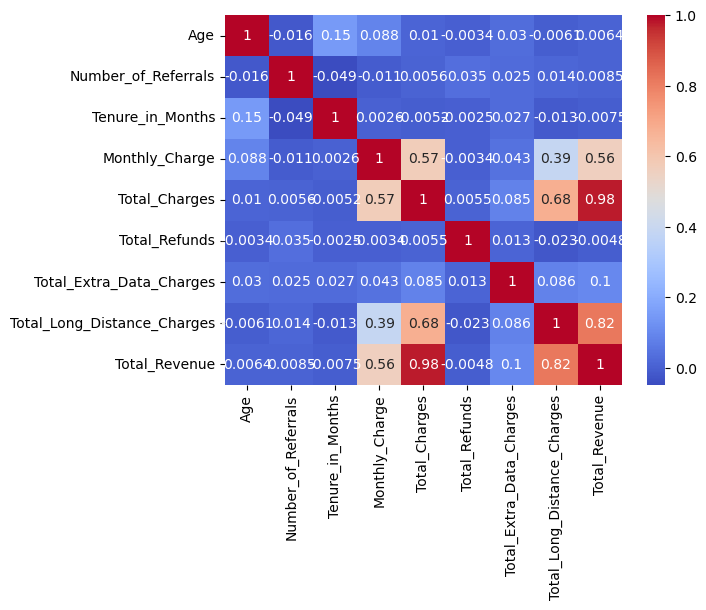

In [40]:
sns.heatmap(Churn_Dataset.corr(numeric_only=True),annot=True,cmap='coolwarm')


<Axes: xlabel='count', ylabel='Married'>

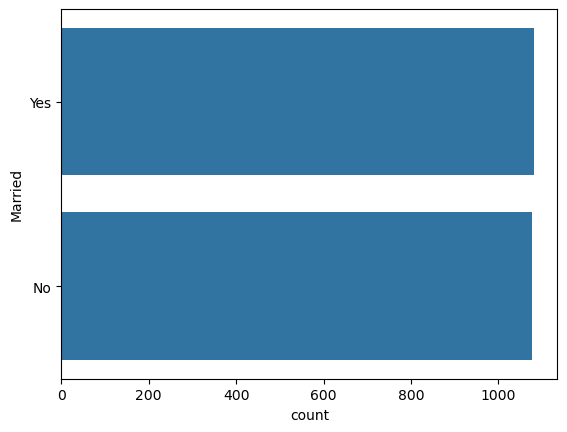

In [41]:
sns.countplot(y='Married',data=Churn_Dataset)


<Axes: xlabel='count', ylabel='Unlimited_Data'>

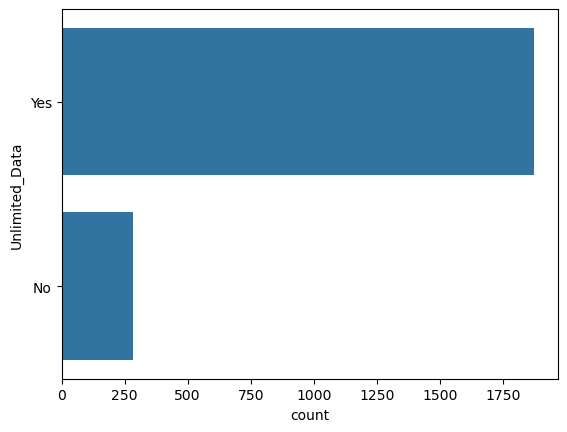

In [42]:
sns.countplot(y='Unlimited_Data',data=Churn_Dataset)

<Axes: xlabel='count', ylabel='Churn_Reason'>

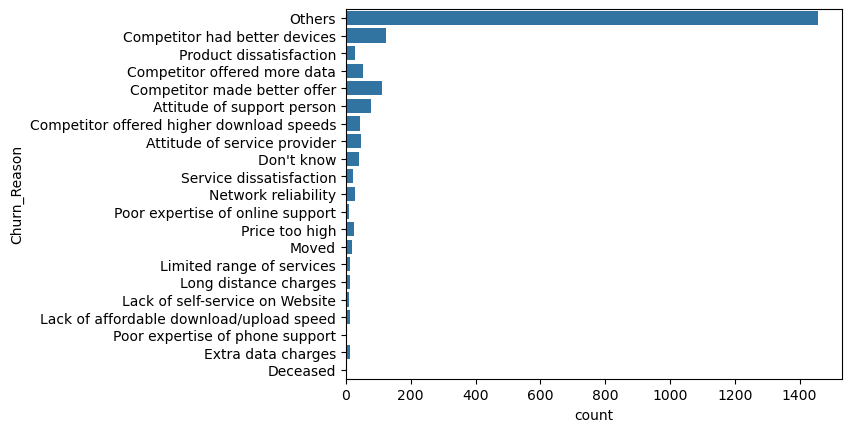

In [45]:
sns.countplot(y='Churn_Reason',data=Churn_Dataset)

In [46]:
# Drop columns that won't be used for predicti
Churn_Dataset.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'],inplace=True, axis=1)

In [47]:
Churn_Dataset.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed
9,Female,41,No,Haryana,13,31,Deal 2,Yes,Yes,Yes,...,One Year,Yes,Credit Card,99.650002,6311.200195,0.00,0,90.089996,6401.290039,Stayed


In [48]:
# List of columns to be label encoded

In [49]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


In [50]:
# Encode categorical variables except the target variable

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    Churn_Dataset[column] = label_encoders[column].fit_transform(Churn_Dataset[column])


In [51]:
# Manually encode the target variable 'Customer_Status'
Churn_Dataset['Customer_Status'] = Churn_Dataset['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [53]:

# Split data into features and target
X = Churn_Dataset.drop('Customer_Status', axis=1)
y = Churn_Dataset['Customer_Status']


In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Random Forest Model

In [55]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [56]:
# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate Model

In [57]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [58]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[276  19]
 [ 45  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       295
           1       0.83      0.67      0.74       137

    accuracy                           0.85       432
   macro avg       0.84      0.80      0.82       432
weighted avg       0.85      0.85      0.85       432



In [59]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


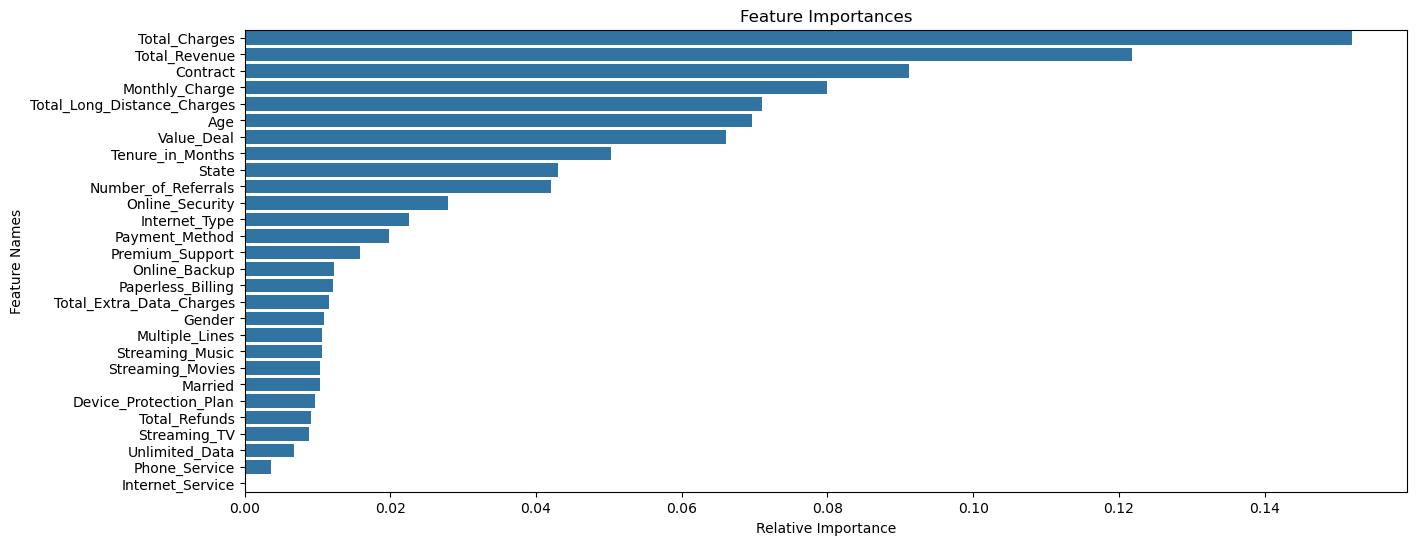

In [60]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()
